In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
# Simulating transactions with features: Transaction Amount and Transaction Frequency
X, y = make_classification(
    n_samples=1000, n_features=2, n_informative=2, n_redundant=0, 
    n_clusters_per_class=1, class_sep=1.5, random_state=42
)


In [6]:

# Adding some anomalies to represent fraud cases
np.random.seed(42)
fraud_indices = np.random.choice(np.where(y == 0)[0], size=50, replace=False)
X[fraud_indices] += np.random.normal(scale=5, size=(50, 2))
y[fraud_indices] = 1

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}
svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]})

In [27]:
best_svm = grid_search.best_estimator_

y_pred = best_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

In [36]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
#Confusion Matrix: Provides deeper insights:
#True Negatives (133): Non-fraudulent transactions correctly classified.
#False Positives (1): Non-fraudulent transactions incorrectly flagged as fraudulent.
#False Negatives (7): Fraudulent transactions missed by the model.
#True Positives (159): Fraudulent transactions correctly classified.

Confusion Matrix:
[[133   1]
 [  7 159]]


In [29]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       134
           1       0.99      0.96      0.98       166

    accuracy                           0.97       300
   macro avg       0.97      0.98      0.97       300
weighted avg       0.97      0.97      0.97       300



In [30]:
# Create a meshgrid for the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))


In [31]:
Z = best_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z

array([[0.80876177, 0.80876177, 0.80876177, ..., 0.80877955, 0.80877542,
        0.8087722 ],
       [0.80876177, 0.80876177, 0.80876177, ..., 0.80878205, 0.80877733,
        0.80877366],
       [0.80876177, 0.80876177, 0.80876177, ..., 0.80878475, 0.8087794 ,
        0.80877524],
       ...,
       [0.80876177, 0.80876177, 0.80876177, ..., 0.80876177, 0.80876177,
        0.80876177],
       [0.80876177, 0.80876177, 0.80876177, ..., 0.80876177, 0.80876177,
        0.80876177],
       [0.80876177, 0.80876177, 0.80876177, ..., 0.80876177, 0.80876177,
        0.80876177]])

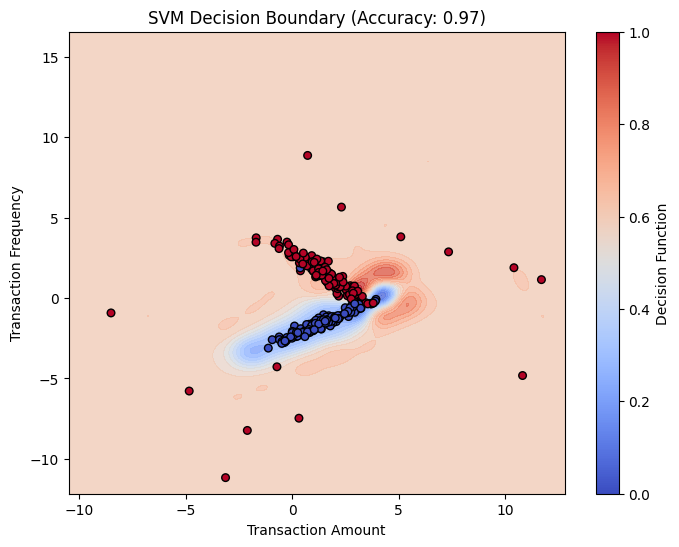

In [37]:
#lets finally plot the data 
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=20, cmap="coolwarm", alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="coolwarm", edgecolor="k", s=30)
plt.title(f"SVM Decision Boundary (Accuracy: {accuracy:.2f})")
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Frequency")
plt.colorbar(label="Decision Function")
plt.show()
#Blue points represent non-fraudulent transactions.
#Red points represent fraudulent transactions.
#the hyperplanes can be seen clearly with their respective colors ,blue area represents non-fraudulent transactions and red are represents the fraudulent transactions